In [ ]:
Librerias

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit, golden

In [ ]:
Graficar Puntos

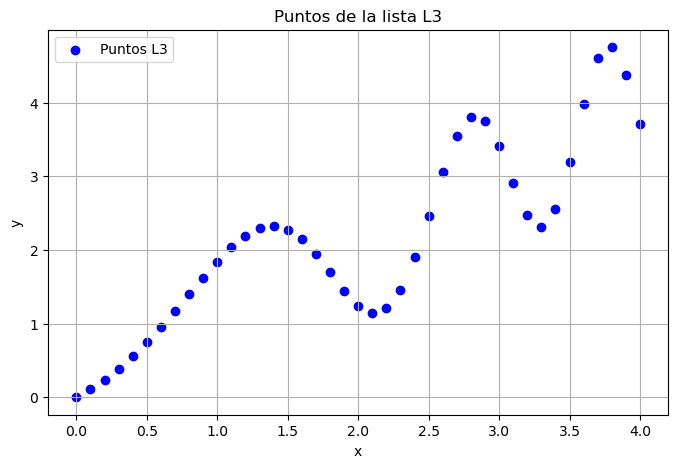

In [17]:
import re
import numpy as np
import matplotlib.pyplot as plt
import os

# Ruta al archivo
ruta_archivo = r"C:\Users\totoe\Desktop\5to semestre\Listas de puntos para el proyecto.txt"

if os.path.exists(ruta_archivo):
    with open(ruta_archivo, 'r', encoding='utf-8') as file:
        contenido = file.read()

    match = re.search(r'L3\s*=\s*\{(.*?)\}\s*(?:;|\n)', contenido, re.DOTALL)

    if match:
        lista_puntos = match.group(1)
        pares = re.findall(r'\{([^,]+),\s*([^\}]+)\}', lista_puntos)

        # Convertir a float
        x_data = np.array([float(p[0]) for p in pares])
        y_data = np.array([float(p[1]) for p in pares])

        # Gráfica
        plt.figure(figsize=(8, 5))
        plt.scatter(x_data, y_data, color='blue', label='Puntos L3')
        plt.title("Puntos de la lista L3")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.grid(True)
        plt.legend()
        plt.show()
else:
    print(f"El archivo no fue encontrado en la ruta: {ruta_archivo}")


In [ ]:
Ajuste de curva

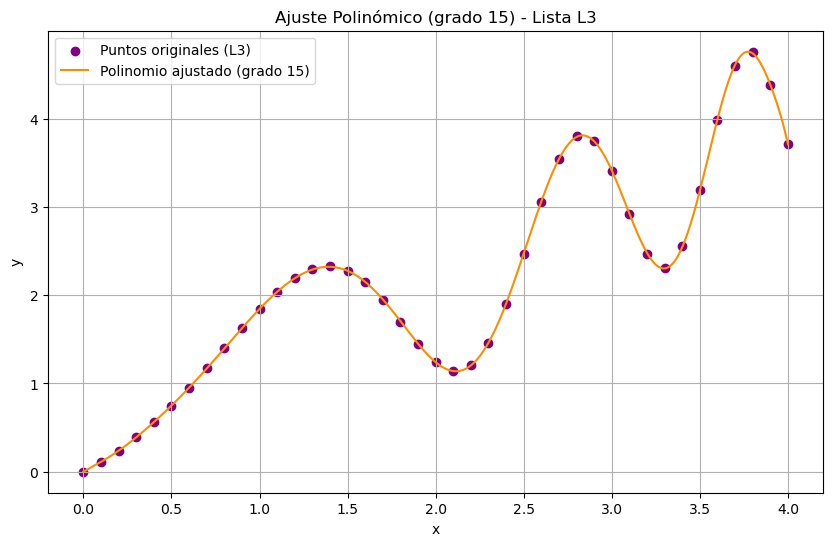

Coeficientes del polinomio (de mayor a menor grado):

[-7.66457175e-03  2.02351062e-01 -2.36126827e+00  1.60522502e+01
 -7.05697173e+01  2.10632176e+02 -4.35959091e+02  6.27068824e+02
 -6.16304168e+02  3.96157678e+02 -1.50956098e+02  2.46166255e+01
  2.53737572e+00 -3.81675976e-01  1.11690806e+00 -2.85214109e-04]


In [22]:
import re
import numpy as np
import matplotlib.pyplot as plt
import os

# Ruta al archivo
ruta_archivo = r"C:\Users\totoe\Desktop\5to semestre\Listas de puntos para el proyecto.txt"

with open(ruta_archivo, 'r', encoding='utf-8') as file:
    contenido = file.read()

# Buscar contenido de L3
match = re.search(r'L3\s*=\s*\{(.*?)\}\s*(?:;|\n)', contenido, re.DOTALL)

if match:
    lista_puntos = match.group(1)
    pares = re.findall(r'\{([^,]+),\s*([^\}]+)\}', lista_puntos)

    x_data = np.array([float(p[0]) for p in pares])
    y_data = np.array([float(p[1]) for p in pares])

    grado = 15
    coeficientes = np.polyfit(x_data, y_data, grado)
    polinomio_ajustado = np.poly1d(coeficientes)

    # Generar puntos suaves para la curva ajustada
    x_curva = np.linspace(min(x_data), max(x_data), 500)
    y_curva = polinomio_ajustado(x_curva)

    # Gráfica
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, color='purple', label='Puntos originales (L3)')
    plt.plot(x_curva, y_curva, color='darkorange', label=f'Polinomio ajustado (grado {grado})')
    plt.title("Ajuste Polinómico (grado 15) - Lista L3")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Mostrar coeficientes
    print("Coeficientes del polinomio (de mayor a menor grado):\n")
    print(coeficientes)


In [ ]:
Que funcion nos da?

In [31]:
funcion_str = "f(x) = "
for i, coef in enumerate(polinomio_ajustado.coefficients):
    exp = len(polinomio_ajustado.coefficients) - i - 1
    signo = " + " if coef >= 0 else " - "
    coef_abs = abs(coef)
    if exp > 1:
        funcion_str += f"{signo}{coef_abs:.6e}·x^{exp}"
    elif exp == 1:
        funcion_str += f"{signo}{coef_abs:.6e}·x"
    else:
        funcion_str += f"{signo}{coef_abs:.6e}"

print("Función polinómica ajustada (grado 15):")
print(funcion_str.lstrip(" +"))


Función polinómica ajustada (grado 15):
f(x) =  - 7.664572e-03·x^15 + 2.023511e-01·x^14 - 2.361268e+00·x^13 + 1.605225e+01·x^12 - 7.056972e+01·x^11 + 2.106322e+02·x^10 - 4.359591e+02·x^9 + 6.270688e+02·x^8 - 6.163042e+02·x^7 + 3.961577e+02·x^6 - 1.509561e+02·x^5 + 2.461663e+01·x^4 + 2.537376e+00·x^3 - 3.816760e-01·x^2 + 1.116908e+00·x - 2.852141e-04


In [ ]:
Maximo utilizando el Metodo de la seccion dorada en el intervalo "[0.6,1.5]"

In [45]:
import numpy as np

f = polinomio_ajustado

xa = 0.6
xb = 1.5

tolerancia = 1e-5
iteracion = 0

R = (np.sqrt(5) - 1) / 2

x1 = xb - R * (xb - xa)
x2 = xa + R * (xb - xa)
f1 = f(x1)
f2 = f(x2)

# Historial
historial = []

while abs(xb - xa) > tolerancia:
    historial.append((iteracion, xa, x1, x2, xb, f1, f2))

    if f1 > f2:
        xb = x2
        x2 = x1
        f2 = f1
        x1 = xb - R * (xb - xa)
        f1 = f(x1)
    else:
        xa = x1
        x1 = x2
        f1 = f2
        x2 = xa + R * (xb - xa)
        f2 = f(x2)

    iteracion += 1

# Resultado forzado dentro del intervalo
x_max = np.clip((xa + xb) / 2, 0.6, 1.5)
y_max = f(x_max)

print("Máximo encontrado usando sección dorada (respetando intervalo):")
print("Intervalo: [0.6, 1.5]")
print(f"Iteraciones: {iteracion}")
print(f"x ≈ {x_max:.6f}")
print(f"y ≈ {y_max:.6f}")


Máximo encontrado usando sección dorada (respetando intervalo):
Intervalo: [0.6, 1.5]
Iteraciones: 24
x ≈ 1.392229
y ≈ 2.321881
